## K-means

In [19]:
import os
from google.cloud import vision_v1
from google.oauth2 import service_account


def batch_ocr(image_folder_path, credentials_path):
    # Initialize the client
    credentials = service_account.Credentials.from_service_account_file(credentials_path)
    client = vision_v1.ImageAnnotatorClient(credentials=credentials)

    # Initialize an empty list to store the results
    results = []

    # Iterate through the images in the folder
    for filename in os.listdir(image_folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            image_path = os.path.join(image_folder_path, filename)
            # Read the image
            with open(image_path, 'rb') as image_file:
                content = image_file.read()
            # Perform OCR on the image
            image = vision_v1.Image(content=content)
            response = client.text_detection(image=image)

            # Extract and store the detected text in a list
            texts = response.text_annotations
            if texts:
                detected_text = texts[0].description.split('\n')
                print(f"filename: {filename}, output= "+detected_text,end =", ")
                print(detected_text,end =", ")
                results.append((filename,detected_text))

    return results
# Example usage:
# Replace 'path/to/your/credentials.json' and 'path/to/your/image_folder' with your paths
# detected_texts = batch_ocr('path/to/your/image_folder', 'path/to/your/credentials.json')
# for i, result in enumerate(detected_texts, start=1):
#     print(f"Text from Image {i}:")
#     for line in result:
#         print(line)
image_folder_path = '../seg_letter/J02'
# Replace with your own Google Cloud credentials JSON file path
credentials_path = '../../credentials.json'
result = batch_ocr(image_folder_path,credentials_path)

filename: 0.jpg, output= 
['道'], filename: 1.jpg, output= 
['界'], filename: 10.jpg, output= 
['國'], filename: 102.jpg, output= 
['w', '*6'], filename: 11.jpg, output= 
['何'], filename: 12.jpg, output= 
['10'], filename: 14.jpg, output= 
['官'], filename: 15.jpg, output= 
['12'], filename: 17.jpg, output= 
['數'], filename: 18.jpg, output= 
['諸'], filename: 2.jpg, output= 
['來'], filename: 20.jpg, output= 
['關', 'I'], filename: 21.jpg, output= 
['道'], filename: 22.jpg, output= 
['以'], filename: 24.jpg, output= 
['012'], filename: 25.jpg, output= 
['既'], filename: 26.jpg, output= 
['胞'], filename: 27.jpg, output= 
['ru', 'ce'], filename: 28.jpg, output= 
['建'], filename: 29.jpg, output= 
['坐'], filename: 3.jpg, output= 
['...'], filename: 30.jpg, output= 
['谷'], filename: 31.jpg, output= 
['容'], filename: 32.jpg, output= 
['客'], filename: 33.jpg, output= 
['人'], filename: 38.jpg, output= 
['14'], filename: 4.jpg, output= 
['來'], filename: 41.jpg, output= 
['現'], filename: 42.jpg, output= 


In [20]:
print(result)

[('0.jpg', ['道']), ('1.jpg', ['界']), ('10.jpg', ['國']), ('102.jpg', ['w', '*6']), ('11.jpg', ['何']), ('12.jpg', ['10']), ('14.jpg', ['官']), ('15.jpg', ['12']), ('17.jpg', ['數']), ('18.jpg', ['諸']), ('2.jpg', ['來']), ('20.jpg', ['關', 'I']), ('21.jpg', ['道']), ('22.jpg', ['以']), ('24.jpg', ['012']), ('25.jpg', ['既']), ('26.jpg', ['胞']), ('27.jpg', ['ru', 'ce']), ('28.jpg', ['建']), ('29.jpg', ['坐']), ('3.jpg', ['...']), ('30.jpg', ['谷']), ('31.jpg', ['容']), ('32.jpg', ['客']), ('33.jpg', ['人']), ('38.jpg', ['14']), ('4.jpg', ['來']), ('41.jpg', ['現']), ('42.jpg', ['期']), ('43.jpg', ['待']), ('46.jpg', ['祖']), ('47.jpg', ['뵤']), ('5.jpg', ['魔']), ('50.jpg', ['祖']), ('53.jpg', ['取']), ('56.jpg', ['其']), ('57.jpg', ['16']), ('58.jpg', ['米']), ('59.jpg', ['101']), ('6.jpg', ['英']), ('60.jpg', ['酷']), ('64.jpg', ['東', 'Ant']), ('65.jpg', ['好']), ('72.jpg', ['E']), ('74.jpg', ['日']), ('76.jpg', ['本']), ('77.jpg', ['全']), ('78.jpg', ['No']), ('79.jpg', ['仕']), ('80.jpg', ['死']), ('82.jpg', ['孝']), 

In [21]:
print(result[0][1][0])

道


In [22]:
import os
import shutil
# Define your list of tuples (old filename, new filename)
file_rename_list = result
# [
#     ("old_file1.jpg", "new_name1.jpg"),
#     ("old_file2.jpg", "new_name2.jpg"),
#     # Add more tuples as needed
# ]

# Replace 'path/to/your/folder' with the path to the folder containing your files
folder_path = image_folder_path

# Define the name of the new directory
new_directory_name = "../../seg_letter_new/J02"

# Create the new directory
new_directory_path = os.path.join(folder_path, new_directory_name)
os.makedirs(new_directory_path, exist_ok=True)

# Iterate through the list of tuples
for old_filename, new_filename in file_rename_list:
    # Construct the full paths for the old and new names
    old_path = os.path.join(folder_path, old_filename)
    new_path = os.path.join(new_directory_path, new_filename[0]+old_filename[:-4]+".jpg")

    # Move the file to the new directory
    shutil.copy(old_path, new_path)

    print(f"Moved: {old_filename} to {new_directory_name}/{new_filename}")

Moved: 0.jpg to ../../seg_letter_new/J02/['道']
Moved: 1.jpg to ../../seg_letter_new/J02/['界']
Moved: 10.jpg to ../../seg_letter_new/J02/['國']
Moved: 102.jpg to ../../seg_letter_new/J02/['w', '*6']
Moved: 11.jpg to ../../seg_letter_new/J02/['何']
Moved: 12.jpg to ../../seg_letter_new/J02/['10']
Moved: 14.jpg to ../../seg_letter_new/J02/['官']
Moved: 15.jpg to ../../seg_letter_new/J02/['12']
Moved: 17.jpg to ../../seg_letter_new/J02/['數']
Moved: 18.jpg to ../../seg_letter_new/J02/['諸']
Moved: 2.jpg to ../../seg_letter_new/J02/['來']
Moved: 20.jpg to ../../seg_letter_new/J02/['關', 'I']
Moved: 21.jpg to ../../seg_letter_new/J02/['道']
Moved: 22.jpg to ../../seg_letter_new/J02/['以']
Moved: 24.jpg to ../../seg_letter_new/J02/['012']
Moved: 25.jpg to ../../seg_letter_new/J02/['既']
Moved: 26.jpg to ../../seg_letter_new/J02/['胞']
Moved: 27.jpg to ../../seg_letter_new/J02/['ru', 'ce']
Moved: 28.jpg to ../../seg_letter_new/J02/['建']
Moved: 29.jpg to ../../seg_letter_new/J02/['坐']
Moved: 3.jpg to ../.

OSError: [Errno 22] Invalid argument: '../seg_letter/J02\\../../seg_letter_new/J02\\".89.jpg'

In [1]:
import time
import sys
! pip install numpy
import numpy as np
! pip install matplotlib
import matplotlib.pyplot as plt

import math
import os
from matplotlib.pyplot import imread
# from mpl_toolkits.mplot3d import Axes3D #This is for 3d scatter plots.

import cv2
import functools
from sklearn.decomposition import PCA


C:\Users\jinpaiduizhang\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\jinpaiduizhang\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='


These programming exercises will focus on K-means clustering. 

If you're unsure of how k-means works, read this very helpful and freely available online breakdown from Stanford's CS221 course; https://stanford.edu/~cpiech/cs221/handouts/kmeans.html


In [2]:
train_images = []
path = "../output3"
for file in os.listdir(path):
    if file.endswith(".png"):
        im = cv2.imread(path + "/" + file)
        y = list(im.ravel())
        y = np.array(y)
        #im =imread(path + "/" + file)
        train_images.append(y)
# plt.imshow(train_images[0])  #not using since it is 1D array
# plt.show()
train_images[0]


array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [3]:
#X = np.load("./data.npy")
X = np.array(train_images)
m,n = X.shape
pca = PCA(n_components = min(m,n),random_state=2023)
Y = X.T
pca.fit(X)


# k=4

PCA(copy=True, iterated_power='auto', n_components=578, random_state=2023,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
X_pca = pca.transform(X)
print(X_pca.shape)
X= X_pca

(578, 578)



K-means is a special, simple case of the Expectation Maximisation (EM) algorithm.

This simplified EM (k-means), is divided into two steps.

The **E-Step**, where for every sample in your dataset you find which "centroid" that datapoint is closest to that sample, and record that information.

The **M-Step**, where you move each "centroid" to the center of the samples which were found to be closest to it in the **E-Step**.

Each *centroid* is simply an estimated mean of a cluster. If you have $1$ centroid, then this centroid will become the mean of all your data.

Centroids are initially random values, and the k-means algorithm attempts to modify them so that each one represents the center of a cluster.

We have implemented a centroids initialization function.

In [5]:
from random import sample
import random
random.seed(1)
def initialise_parameters(m, X):
    C = sample(list(X), k=m)
    return np.array(C)






---
   **1.1:** $E\_step(C, X) = L$, where $L$ is a matrix of the same dimension of the dataset $X$.
   
   This function is is the **E-Step** 

---

In [6]:
def distance(centre,sample):
    return(math.sqrt(np.sum((centre-sample)**2)))
#     return(math.sqrt((centre[0]-sample[0])**2+(centre[1]-sample[1])**2))
def E_step(C, X):
    L = np.zeros(X.shape)
    for i in range(0, X.shape[0]):
        ags = np.argmin(np.linalg.norm(C - X[i], axis = 1))
        L[i] = C[ags]
    return L
# L = E_step(C, X)/

# fig = plt.figure(figsize=(16, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(L[:, 0], L[:, 1],L[:,2"])
# plt.show()
# print(L)

**TASK 1.2:** Create a function $M\_step(C, X, L) = C$ which returns $C$ modified so that each centroid in $C$ is placed in the middle of the samples assigned to it. This is the **M-Step**.

In other words, make each centroid in $C$ the average of all the samples which were found to be closest to it during the **E-step**. This is also called the "update step" for K-means.

---

**HINT:** https://docs.scipy.org/doc/numpy/reference/generated/numpy.array_equal.html

In [7]:
def M_step(C, X, L):
    new_C = np.zeros(C.shape)
    for i in range(0, C.shape[0]):
        centroid = C[i]
        count = np.count_nonzero(np.all(L == centroid, axis = 1))
        new_C[i] = np.sum(X[np.all(L == C[i], axis = 1)], axis = 0) / count
    return new_C

# print('Before:')
# print(C)
# print('\nAfter:')
# new_C = M_step(C, X, L)
# print(new_C)

Implement $kmeans(X, m, threshold) = C, L$ which takes a dataset $X$ (of any dimension) and a scalar value $m$ and a scalar $threshold$ as input. 

In [8]:

def kmeans(X, m, threshold):
    L = np.zeros(X.shape)
    C = initialise_parameters(m, X)
    diff = float('inf')
    loss_prev = float('inf')
    while diff > threshold:
        L = E_step(C, X)
        loss_cur = np.sum((np.linalg.norm(X - L, axis=1)**2))
        diff = abs(loss_prev - loss_cur)
        loss_prev = loss_cur
        C = M_step(C, X, L)
    # due to the fact that we pair the data point and cluster centroid
    # by the value in L match the value in C, we need to do E_step one more time
    L = E_step(C, X)
    return C, L

# C_final, L_final = kmeans(X, k, 1e-6)

print('Done')
# print(C_final)
def allocator(X, L, c):
    cluster = []
    for i in range(L.shape[0]):
        if np.array_equal(L[i, :], c):
            cluster.append(X[i, :])
    return np.asarray(cluster)


Done


In [9]:
def evaluation(X, L_final, C_final):
    length = 0
    total_distance = 0 #evaluation
    density = 0
    for i in range(k):
        cluster = allocator(X, L_final, C_final[i, :])
#         print("the "+str(i)+" cluster is: "+str(cluster[:,i]))
        length += len(cluster)
        for d in range(cluster.shape[0]):
            total_distance += distance(C_final[i,:],cluster[d,:])
        density += total_distance/len(cluster)
    density = total_distance/k
    return length,total_distance,density
# length,total_distance = evaluation(X, L_final, C_final)
# print("sum "+str(length))
# print("The distance is "+ str(total_distance))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 Error, when i = 37 the clusters start overlapping: 591
38 39 40 41 42 43 44 45 46 47 48 49 

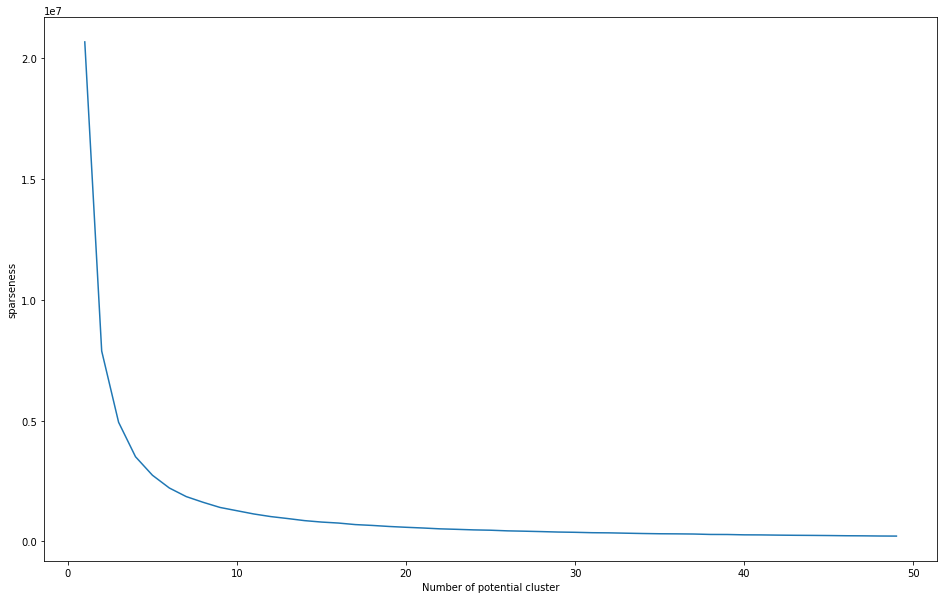

In [10]:
xaxis = []
densityaxis = []
yaxis = []
wrongtimes = 0
for i in range(1,50):
    xaxis.append(i)
    k = i
    C_final, L_final = kmeans(X, k, 1e-6)
    length,total_distance,density = evaluation(X, L_final, C_final)
    yaxis.append(total_distance)
    densityaxis.append(density)
    print(k,end = " ")
    if(length!=X.shape[0]):
        print("Error, when i = "+str(i)+" the clusters start overlapping: "+str(length))
        wrongtimes += 1
    else:
        wrongtimes = 0
    
    if(wrongtimes>=5):
        break
        

fig = plt.figure(figsize=(16, 10))
plt.plot(xaxis,densityaxis)
plt.xlabel("Number of potential cluster")
plt.ylabel("sparseness")
plt.show()

In [14]:
import pandas as pd
darray = np.array(densityaxis) # start at cluster 1
outcome = np.zeros(darray.shape[0]-1) 
for i in range(outcome.shape[0]): #start at cluster 2
    outcome[i] = (darray[i+1] - darray[i])/darray[i]
outcome = outcome.tolist()

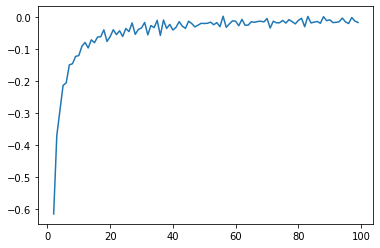

In [155]:
plt.plot(xaxis[1:],outcome)

In [11]:
# one time cluster


k=10 # Use this to see the cluster circumstance in specific cluster number

C_f, L_f = kmeans(X, k, 1e-6)

total_img = []
def allocator2(X,L, c):
    cluster = []
    idlist = []
    for i in range(L.shape[0]):
        if np.array_equal(L[i, :], c):
            cluster.append(X[i, :])
            idlist.append(i)
    return idlist
for i in range(k):
#     print("In cluster: "+str(i))
    idlist = allocator2(X,L_f,C_f[i, :])
#     print(idlist)
    total_img.append(np.array(idlist))
    
total_img = np.array(total_img)



# index of images
print("clusters: ")

print(total_img)

clusters: 
[array([ 42,  45,  89, 100, 167, 287, 288, 311, 380, 381, 418, 452, 489,
        527, 545, 556])
 array([  2,   3,   4,   5,  30,  31,  32,  33,  36,  37,  38,  39,  43,
         44,  46,  47,  49,  50,  51,  52,  55,  65,  66,  68,  69,  84,
        101, 102, 103, 104, 120, 121, 122, 124, 132, 136, 177, 179, 180,
        181, 195, 196, 197, 199, 221, 224, 225, 226, 246, 257, 258, 259,
        260, 276, 277, 279, 280, 292, 293, 294, 295, 297, 343, 378, 396,
        397, 422, 433, 540, 544, 546, 547, 551, 552, 553, 561, 562])
 array([  0,  14,  15,  34,  75,  76,  82,  83,  85,  86, 145, 223, 245,
        352, 393, 395, 451, 466, 500, 522, 528, 534, 538])
 array([  6, 184, 185, 194, 198, 210, 212, 298, 299, 301, 302, 303, 304,
        309, 310, 312, 313, 314, 315, 316, 317, 327, 328, 329, 330, 333,
        346, 347, 348, 349, 364, 389, 400, 411, 484, 485, 486, 487, 488,
        490, 491, 492, 513, 514, 516, 518, 519, 520, 521, 542, 543, 550,
        555, 557, 558, 559, 565, 5

C:\Users\jinpaiduizhang\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [13]:

def showimg(x): #show one image\
    i = 0 # file 0 is a directory created by ipynb.
    for file in os.listdir(path):
        if file.endswith(".png"):
            if(x == i): 
                im = cv2.imread(path + "/" +file)
                print(str(file),end=". ")
                break
            else:
                i += 1
    return im
def see_a_cluster(total_img, x):
    for i in total_img[x]:
        showimg(i)

# see the first cluster    
# see_a_cluster(total_img,0) #(0 is index of cluster, change it to see different cluster)
for i in range(k):
    print("Cluster "+str(i)+" contains: ")
    print(see_a_cluster(total_img,i))

Cluster 0 contains: 
137.png. 14.png. 18.png. 19.png. 25.png. 358.png. 359.png. 38.png. 441.png. 442.png. 476.png. 506.png. 54.png. 574.png. 7.png. 8.png. None
Cluster 1 contains: 
100.png. 101.png. 102.png. 103.png. 126.png. 127.png. 128.png. 129.png. 131.png. 132.png. 133.png. 134.png. 138.png. 139.png. 140.png. 141.png. 143.png. 144.png. 145.png. 146.png. 149.png. 158.png. 159.png. 160.png. 161.png. 175.png. 190.png. 191.png. 192.png. 193.png. 207.png. 208.png. 209.png. 210.png. 218.png. 221.png. 259.png. 260.png. 261.png. 262.png. 275.png. 276.png. 277.png. 279.png. 299.png. 300.png. 301.png. 302.png. 320.png. 330.png. 331.png. 332.png. 333.png. 348.png. 349.png. 350.png. 351.png. 362.png. 363.png. 364.png. 365.png. 367.png. 408.png. 44.png. 456.png. 457.png. 48.png. 49.png. 65.png. 69.png. 70.png. 71.png. 75.png. 76.png. 77.png. 84.png. 85.png. None
Cluster 2 contains: 
1.png. 111.png. 112.png. 13.png. 167.png. 168.png. 173.png. 174.png. 176.png. 177.png. 23.png. 30.png. 32.png. 4